<a href="https://colab.research.google.com/github/platypus2000jp/Colaboratory/blob/main/%E3%82%A2%E3%83%8A%E3%82%B0%E3%83%AA%E3%83%95%E7%94%BB%E5%83%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG_0960.JPG to IMG_0960 (2).JPG


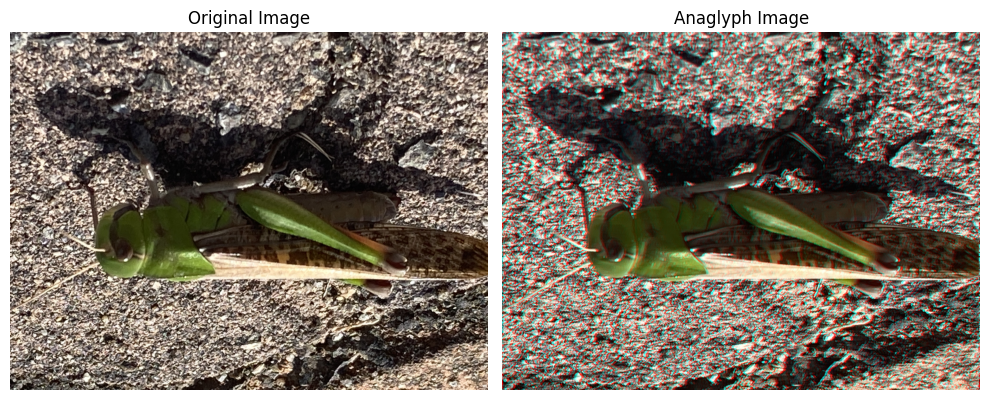

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# prompt: アナグリフ画像を作成したいので、画像をアップロードします。左に元画像、右にアナグリフ画像を並べて表示してください。
# 処理後の画像に名前を付けてダウンロードします。
# アナグリフの処理は以下のコードを適用します。強力な3D効果を与えます。
# from PIL import Image
# import numpy as np
# def create_anaglyph(image_path, shift=10, output_path='anaglyph_image.jpg'):
#     """
#     Create an anaglyph image from a given input image.
#     Parameters:
#         image_path (str): Path to the input image.
#         shift (int): Number of pixels to shift for the stereo effect.
#         output_path (str): Path to save the resulting anaglyph image.
#     """
#     # Open the image
#     image = Image.open(image_path)
#     # Convert the image to a numpy array
#     img_array = np.array(image)
#     # Ensure the image has three color channels (RGB)
#     if img_array.shape[-1] != 3:
#         raise ValueError("Input image must have 3 color channels (RGB).")
#     # Create shifted versions of the image for the stereo effect
#     left_image = np.roll(img_array, shift, axis=1)  # Red channel (left view)
#     right_image = np.roll(img_ar

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def create_anaglyph(image_path, shift=10):
    """
    Create an anaglyph image from a given input image.
    Parameters:
        image_path (str): Path to the input image.
        shift (int): Number of pixels to shift for the stereo effect.
    Returns:
        tuple: A tuple containing the original image and the anaglyph image as PIL Image objects.
    """
    try:
        # Open the image
        image = Image.open(image_path)
        # Convert the image to a numpy array
        img_array = np.array(image)
        # Ensure the image has three color channels (RGB)
        if img_array.shape[-1] != 3:
            raise ValueError("Input image must have 3 color channels (RGB).")
        # Create shifted versions of the image for the stereo effect
        left_image = np.roll(img_array, shift, axis=1)  # Red channel (left view)
        right_image = np.roll(img_array, -shift, axis=1)  # Cyan channels

        # Combine the channels to create the anaglyph
        anaglyph_array = np.copy(img_array)
        anaglyph_array[:, :, 0] = left_image[:, :, 0]  # Red channel from left image
        anaglyph_array[:, :, 1] = right_image[:, :, 1]  # Green channel from right image
        anaglyph_array[:, :, 2] = right_image[:, :, 2]  # Blue channel from right image

        # Convert back to PIL Image
        anaglyph_image = Image.fromarray(anaglyph_array.astype('uint8'))
        return image, anaglyph_image
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None, None
    except ValueError as e:
        print(f"Error: {e}")
        return None, None


uploaded = files.upload()

image_path = list(uploaded.keys())[0] #get the uploaded image name

original_image, anaglyph_image = create_anaglyph(image_path)

if original_image and anaglyph_image:
    # Display the images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(anaglyph_image)
    plt.title("Anaglyph Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    #save the image
    anaglyph_image.save("anaglyph_image.jpg")
    files.download("anaglyph_image.jpg")